<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/needhelpwithorganization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df_dirty = pd.read_csv("/content/Hydroxylysine OI data - Copy.csv")
df_dirty

,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,type of comparaison,Method,Control vs patient vs aggregate,Measurement,% hydroxylysine,% hydroxylysine per publication,%hydoxylation_perp_perds,STD calculated,STD simulated from regression,STD combined
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,NaN,...,1,1,1,1,0.465116,NaN,NaN,NaN,0.093500,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,NaN,...,1,2,1,1,0.219020,NaN,NaN,NaN,0.083326,NaN
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,2,5,1,1,0.218750,0.314373,0.314373,0.00587,NaN,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,2,3,1,1,0.371429,NaN,NaN,NaN,0.041000,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,2,3,1,1,0.352941,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,3,5,1,1,0.370504,NaN,NaN,NaN,0.044100,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,3,5,1,1,0.412710,NaN,NaN,NaN,0.051200,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,3,5,1,1,0.423261,NaN,NaN,NaN,0.053000,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,3,5,1,1,0.425180,NaN,NaN,NaN,0.053300,NaN


In [12]:
df_dirty.columns

Index(['ID', 'Author', 'Year', 'Title', 'Cell1', 'Cell2', 'Age', 'Sex', 'Type',
       'n', 'n2', 'Contains std', 'type of comparaison', 'Method',
       'Control vs patient vs aggregate', 'Measurement', '% hydroxylysine',
       ' % hydroxylysine per publication', '%hydoxylation_perp_perds',
       'STD calculated', 'STD simulated from regression', 'STD combined'],
      dtype='object')

In [15]:
df_clean = df_dirty[[
    "Cell1",
    "Type",
    "n",
    "Method",
    "% hydroxylysine"
    ]]
df_clean
#why does this needs double [[]]

,Cell1,Type,n,Method,% hydroxylysine
0,2,9,NaN,1,0.465116
1,2,2,NaN,2,0.219020
2,1,2,3.0,5,0.218750
3,2,2,NaN,3,0.371429
4,2,2,NaN,3,0.352941
...,...,...,...,...,...
64,1,4,NaN,5,0.370504
65,1,4,NaN,5,0.412710
66,1,4,NaN,5,0.423261
67,1,4,NaN,5,0.425180


In [85]:
df_anova = df_clean[[
    "Cell1",
    "Type",
    "Method",
    "% hydroxylysine"
    ]]
df_anova

,Cell1,Type,Method,% hydroxylysine
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [86]:
df_anova.columns = ['Cell','Type','Method','Value']
df_anova

,Cell,Type,Method,Value
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [17]:
grouped1 = df_clean.groupby(['Cell1']).agg(['mean', 'std'])['% hydroxylysine']
grouped2 = df_clean.groupby(['Type']).agg(['mean', 'std'])['% hydroxylysine']
grouped3 = df_clean.groupby(['Method']).agg(['mean', 'std'])['% hydroxylysine']
print(grouped1, grouped2, grouped3)

           mean       std
Cell1                    
1      0.345038  0.106355
2      0.252388  0.094568           mean       std
Type                    
1     0.265991  0.108692
2     0.350116  0.106685
3     0.328320  0.120298
4     0.328815  0.101973
9     0.296495  0.119687             mean       std
Method                    
1       0.465116       NaN
2       0.219020       NaN
3       0.231887  0.076739
5       0.348188  0.096520
6       0.626000       NaN
7       0.360000       NaN


In [18]:
# Define the columns to group by
group_columns = ['Cell1', 'Type', 'Method']

# Use a for loop to group the data and calculate summary statistics for each column
for column in group_columns:
    grouped = df_clean.groupby(column)['% hydroxylysine'].describe()
    print(f"Summary statistics for column '{column}':\n{grouped.transpose()}\n")

Summary statistics for column 'Cell1':
Cell1          1          2
count  53.000000  16.000000
mean    0.345038   0.252388
std     0.106355   0.094568
min     0.121188   0.114455
25%     0.291847   0.201428
50%     0.349400   0.255873
75%     0.405995   0.288673
max     0.626000   0.465116

Summary statistics for column 'Type':
Type          1          2          3          4         9
count  9.000000  19.000000  17.000000  18.000000  6.000000
mean   0.265991   0.350116   0.328320   0.328815  0.296495
std    0.108692   0.106685   0.120298   0.101973  0.119687
min    0.129901   0.218750   0.114455   0.121188  0.151000
25%    0.136000   0.276467   0.252078   0.268106  0.207250
50%    0.299520   0.324460   0.305276   0.346043  0.300500
75%    0.322542   0.400120   0.388729   0.402158  0.364390
max    0.405995   0.626000   0.539329   0.500959  0.465116

Summary statistics for column 'Method':
Method         1        2          3          5      6     7
count   1.000000  1.00000  17.000000 

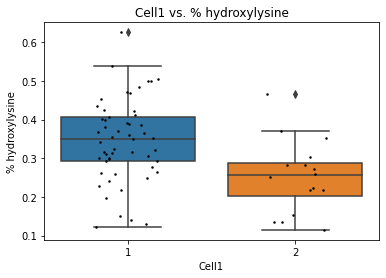

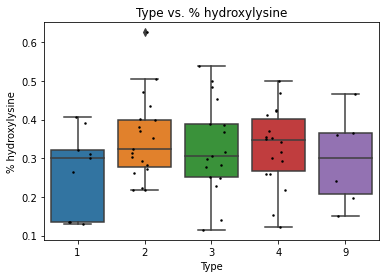

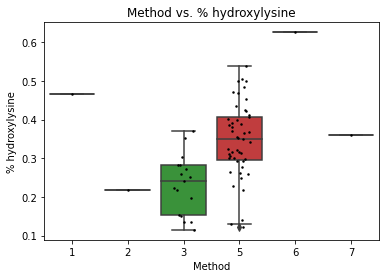

In [19]:
import seaborn as sns

# Define the columns to group by
group_columns = ['Cell1', 'Type', 'Method']

# Loop over the group columns and create a box plot for each one
for column in group_columns:
    sns.boxplot(x=column, y='% hydroxylysine', data=df_clean)
    sns.stripplot(x=column, y='% hydroxylysine', data=df_clean, color='black', jitter=0.2, size=2.5)
    plt.title(f"{column} vs. % hydroxylysine")
    plt.show()

<ipython-input-43-e2458bdd23c5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["bone", "fibroblast"])
<ipython-input-43-e2458bdd23c5>:17: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Bone", "Fibroblast")


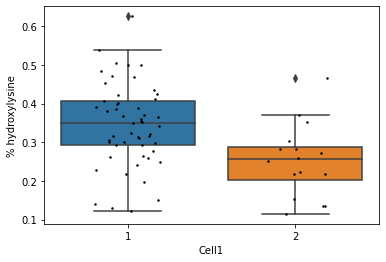

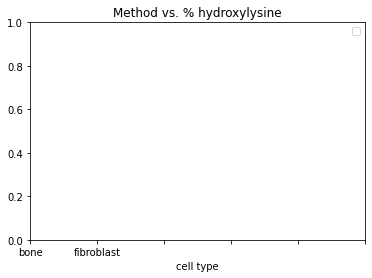

In [43]:
import seaborn as sns

# Define the columns to group by
#group_columns = ['Cell1', 'Type', 'Method']
#Previous method cell1_labels = ", ".join(df_clean['Cell1'].unique())
cell1_labels = df_clean['Cell1'].unique().astype(str)

# Loop over the group columns and create a box plot for each one
#for column in group_columns:
sns.boxplot(x="Cell1", y='% hydroxylysine', data=df_clean)
sns.stripplot(x="Cell1", y='% hydroxylysine', data=df_clean, color='black', jitter=0.2, size=2.5)
fig, ax = plt.subplots()
plt.title(f"{column} vs. % hydroxylysine")
plt.xlabel("cell type")
ax.set_xticklabels(["bone", "fibroblast"])
#plt.xlabel(", ".join(cell1_labels))
plt.legend("Bone", "Fibroblast")
#plt.legend(cell1_labels.tolist())
plt.show()

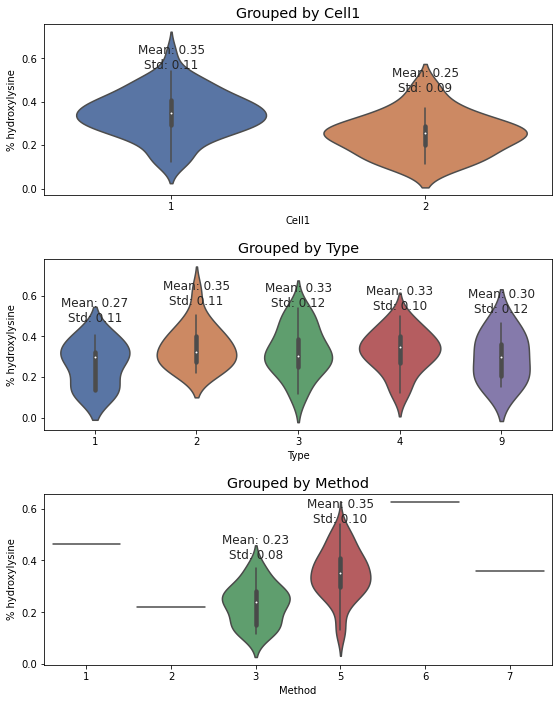

In [ ]:
import seaborn as sns


# Group the data by the three categorical variables and calculate the mean and std
grouped_bycell = df.groupby('Cell1')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bytype = df.groupby('Type')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bymethod = df.groupby('Method')['% hydroxylysine'].agg([np.mean, np.std])

# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Set the font size for the plots
sns.set(font_scale=1.2)

# Create a violin plot for each group in each categorical variable
sns.violinplot(x='Cell1', y='% hydroxylysine', data=df, ax=axes[0])
sns.violinplot(x='Type', y='% hydroxylysine', data=df, ax=axes[1])
sns.violinplot(x='Method', y='% hydroxylysine', data=df, ax=axes[2])

# Add the mean and standard deviation as text annotations above each violin plot
for ax, grouped_data in zip(axes, [grouped_bycell, grouped_bytype, grouped_bymethod]):
    for i, (index, row) in enumerate(grouped_data.iterrows()):
        mean = row['mean']
        std = row['std']
        ax.text(i, mean + std + 0.1, f"Mean: {mean:.2f}\nStd: {std:.2f}", 
                horizontalalignment='center', fontsize=12)

# Set the axis labels and title for each subplot
axes[0].set_ylabel('% hydroxylysine')
axes[1].set_ylabel('% hydroxylysine')
axes[2].set_ylabel('% hydroxylysine')
axes[0].set_title('Grouped by Cell1')
axes[1].set_title('Grouped by Type')
axes[2].set_title('Grouped by Method')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


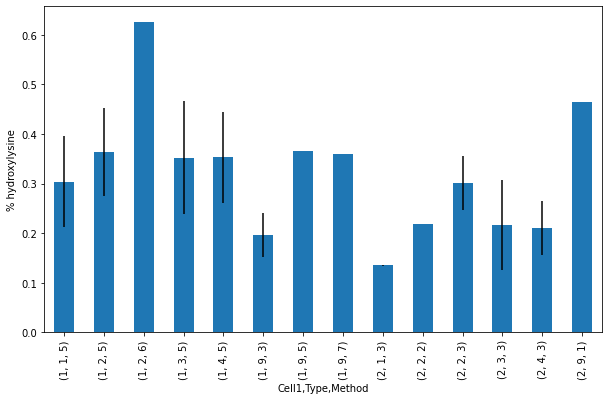

In [ ]:
grouped['mean'].plot(kind='bar', yerr=grouped['std'], figsize=(10, 6))
plt.ylabel('% hydroxylysine')
plt.show()

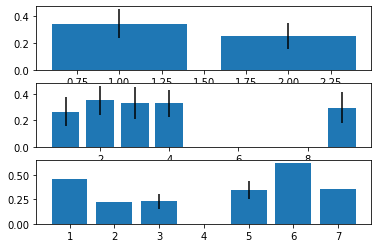

In [ ]:
grouped_bycell = df.groupby('Cell1')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bytype = df.groupby('Type')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bymethod = df.groupby('Method')['% hydroxylysine'].agg([np.mean, np.std])
fig, ax = plt.subplots(3,1)
ax[0].bar(grouped_bycell.index, grouped_bycell['mean'], yerr=grouped_bycell['std'])
ax[1].bar(grouped_bytype.index, grouped_bytype['mean'], yerr=grouped_bytype['std'])
ax[2].bar(grouped_bymethod.index, grouped_bymethod['mean'], yerr=grouped_bymethod['std'])
plt.show()

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your dataset has 3 categorical variables A, B, C and 1 continuous variable Y
model = ols('Value ~ Cell + Type + Method', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

            sum_sq    df         F    PR(>F)
Cell      0.000026   1.0  0.002420  0.960912
Type      0.000910   1.0  0.085722  0.770620
Method    0.029128   1.0  2.742539  0.102530
Residual  0.690342  65.0       NaN       NaN


In [88]:
# Calculate eta-squared
eta_squared = anova_table['sum_sq']/sum(anova_table['sum_sq'])

# Print eta-squared for each categorical variable
print(eta_squared)

Cell        0.000036
Type        0.001264
Method      0.040432
Residual    0.958268
Name: sum_sq, dtype: float64


In [48]:
!pip install pyod
install statsmodels

SyntaxError: ignored

In [49]:
import numpy as np
from scipy import stats

def grubbs_test(data, alpha=0.05):
    """Perform the Grubbs' test to detect outliers in a univariate dataset."""
    n = len(data)
    if n < 3:
        return []
    sorted_data = np.sort(data)
    mean = np.mean(sorted_data)
    std = np.std(sorted_data, ddof=1)
    t_critical = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) / np.sqrt(n) * t_critical / np.sqrt(n - 2 + t_critical ** 2)
    outliers = []
    for i in range(n):
        if np.abs(sorted_data[i] - mean) / std > threshold:
            outliers.append(sorted_data[i])
    return outliers

# Example usage
grouped = df_clean.groupby(['Cell1', 'Type', 'Method'])
for name, group in grouped:
    outliers = grubbs_test(group['% hydroxylysine'])
    print(f"Outliers in group {name}: {outliers}")

Outliers in group (1, 1, 5): []
Outliers in group (1, 2, 5): []
Outliers in group (1, 2, 6): []
Outliers in group (1, 3, 5): []
Outliers in group (1, 4, 5): []
Outliers in group (1, 9, 3): []
Outliers in group (1, 9, 5): []
Outliers in group (1, 9, 7): []
Outliers in group (2, 1, 3): []
Outliers in group (2, 2, 2): []
Outliers in group (2, 2, 3): []
Outliers in group (2, 3, 3): []
Outliers in group (2, 4, 3): []
Outliers in group (2, 9, 1): []


In [56]:
import pandas as pd
import numpy as np
from scipy.stats import t as tdist


# Define the Grubbs test function
def grubbs_test(data, alpha=0.05):
    """
    Perform Grubbs test to detect outliers in a univariate dataset.
    Returns a list of the outlier indices.
    """
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    if std == 0:
        return []
    t = tdist.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) / np.sqrt(n) * np.sqrt(t**2 / (n - 2 + t**2))
    outliers = []
    for i, x in enumerate(data):
        if abs(x - mean) > std * threshold:
            outliers.append(i)
    return outliers


# Group the data by Cell1 and apply the Grubbs test to each group
groups = df_clean.groupby("Type")
for name, group in groups:
    outliers = grubbs_test(group["% hydroxylysine"])
    if outliers:
        print(f"Outliers for Type={name}: {group.index[outliers]}")

In [65]:
out_test = df_clean[df_clean["Type"]==3]
out_test


,Cell1,Type,n,Method,% hydroxylysine
7,2,3,4.0,3,0.252078
10,2,3,NaN,3,0.283708
17,1,3,12.0,5,0.140198
21,2,3,12.0,3,0.114455
23,1,3,NaN,5,0.297000
43,1,3,NaN,5,0.539329
44,1,3,NaN,5,0.228537
45,1,3,NaN,5,0.247722
46,1,3,NaN,5,0.278417
47,1,3,NaN,5,0.305276


In [64]:
out_test.describe([0.05,0.95])

,Cell1,Type,n,Method,% hydroxylysine
count,17.000000,17.0,3.000000,17.000000,17.000000
mean,1.176471,3.0,9.333333,4.647059,0.328320
std,0.392953,0.0,4.618802,0.785905,0.120298
min,1.000000,3.0,4.000000,3.000000,0.114455
5%,1.000000,3.0,4.800000,3.000000,0.135050
50%,1.000000,3.0,12.000000,5.000000,0.305276
95%,2.000000,3.0,12.000000,5.000000,0.507098
max,2.000000,3.0,12.000000,5.000000,0.539329


In [68]:
!pip install outlier_utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from outliers import smirnov_grubbs as grubbs

Y_train = np.asarray(out_test[['% hydroxylysine']])
Y_train


array([[0.25207756],
       [0.28370787],
       [0.14019802],
       [0.11445545],
       [0.297     ],
       [0.53932854],
       [0.22853717],
       [0.24772182],
       [0.27841727],
       [0.30527578],
       [0.31678657],
       [0.36666667],
       [0.38585132],
       [0.38872902],
       [0.45395684],
       [0.48369305],
       [0.49904077]])

In [78]:
from outliers import smirnov_grubbs as grubbs
grubbs.test(Y_train, alpha=.01)

array([[0.25207756],
       [0.28370787],
       [0.14019802],
       [0.11445545],
       [0.297     ],
       [0.53932854],
       [0.22853717],
       [0.24772182],
       [0.27841727],
       [0.30527578],
       [0.31678657],
       [0.36666667],
       [0.38585132],
       [0.38872902],
       [0.45395684],
       [0.48369305],
       [0.49904077]])

In [81]:
grubbs.max_test_outliers(Y_train, alpha=.001) #something is wrong

[]

In [82]:
import numpy as np
from scipy.stats import t
from scipy import mean, std
from scipy.stats import grubbs

# Grubbs' test
alpha = 0.05  # Significance level
n = len(Y_train)
t_critical = t.ppf(1 - alpha / (2*n), n - 2)
mean_data = mean(Y_train)
std_data = std(Y_train, ddof=1)
max_deviation = max(abs(data - mean_data))
grubbs_statistic = max_deviation / std_data
is_outlier = grubbs_statistic > t_critical / np.sqrt(n)

# Print results
print(f"Grubbs' test statistic: {grubbs_statistic:.3f}")
print(f"Critical value: {t_critical:.3f}")
if is_outlier:
    print("The highest value is an outlier")
else:
    print("No outliers detected")

ImportError: ignored

In [96]:
df_knn = df_clean.drop("n",axis=1) #why does axis = 1 
df_knn

,Cell1,Type,Method,% hydroxylysine
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [97]:

unknown_severity = df_knn[df_knn['Type']==9]
unknown_severity

,Cell1,Type,Method,% hydroxylysine
0,2,9,1,0.465116
13,1,9,5,0.365854
24,1,9,3,0.241000
25,1,9,3,0.196000
26,1,9,3,0.151000
29,1,9,7,0.360000


In [98]:
known_severity = df_knn[df_knn['Type']!=9]
known_severity

,Cell1,Type,Method,% hydroxylysine
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
5,1,2,5,0.294000
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
X_train = known_severity[['Cell1', 'Method',"% hydroxylysine"]] # input features
y_train = known_severity['Type'] # output variable
knn.fit(X_train, y_train)

X_test = unknown_severity[['Cell1', 'Method',"% hydroxylysine"]]
predicted_severity = knn.predict(X_test)
predicted_severity

array([2, 4, 2, 4, 1, 4])

In [100]:
df_clean.loc[df_clean["Type"]==9, 'Type'] = predicted_severity
df_clean

,Cell1,Type,n,Method,% hydroxylysine
0,2,2,NaN,1,0.465116
1,2,2,NaN,2,0.219020
2,1,2,3.0,5,0.218750
3,2,2,NaN,3,0.371429
4,2,2,NaN,3,0.352941
...,...,...,...,...,...
64,1,4,NaN,5,0.370504
65,1,4,NaN,5,0.412710
66,1,4,NaN,5,0.423261
67,1,4,NaN,5,0.425180


In [101]:
marks_list = df_clean['Type'].tolist()
print(marks_list)

[2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 3, 2, 2, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 3, 2, 4, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [102]:
from sklearn.cluster import KMeans

X = df_clean['% hydroxylysine'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_clean['cluster_label'] = kmeans.labels_
df_clean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-102-be0a25b7ced2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster_label'] = kmeans.labels_


,Cell1,Type,n,Method,% hydroxylysine,cluster_label
0,2,2,NaN,1,0.465116,0
1,2,2,NaN,2,0.219020,1
2,1,2,3.0,5,0.218750,1
3,2,2,NaN,3,0.371429,2
4,2,2,NaN,3,0.352941,2
...,...,...,...,...,...,...
64,1,4,NaN,5,0.370504,2
65,1,4,NaN,5,0.412710,2
66,1,4,NaN,5,0.423261,2
67,1,4,NaN,5,0.425180,2


In [104]:
df_clean.groupby("cluster_label")['% hydroxylysine'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,10.0,0.501246,0.050400,0.453957,0.469544,0.491367,0.503837,0.626000
1,29.0,0.275909,0.034156,0.217877,0.252078,0.281250,0.303569,0.324460
2,21.0,0.382682,0.027438,0.342686,0.360000,0.380096,0.400240,0.435731
3,9.0,0.141675,0.023809,0.114455,0.129901,0.136000,0.151000,0.196000


In [105]:
df_clean.groupby("Type")['% hydroxylysine'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
1,10.0,0.254492,0.108736,0.129901,0.139750,0.281295,0.319664,0.405995
2,21.0,0.350396,0.107238,0.218750,0.271683,0.324460,0.400240,0.626000
3,17.0,0.328320,0.120298,0.114455,0.252078,0.305276,0.388729,0.539329
4,21.0,0.325740,0.099137,0.121188,0.260192,0.349400,0.370504,0.500959
